# Decision Tree

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

details - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [28]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [30]:
clf = DecisionTreeClassifier(class_weight={0:1, 1:10, 2:3})
# clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

# Can we guess what would this scores be?

0.9473684210526315
1.0


In [31]:
# Can train score ever be not 1?

### Messing with train data

In [32]:
import numpy as np

X_train = np.append(X_train, [X_train[0]], axis=0)
y_train = np.append(y_train, [not y_train[0]], axis=0)

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

# what would the scores be now?

0.9736842105263158
0.9911504424778761


In [34]:
import random

for _ in range(3):
    X_train = np.append(X_train, [X_train[0]], axis=0)
    y_train = np.append(y_train, random.sample([0,1,2], 1), axis=0)

In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9473684210526315
0.9741379310344828


# Visualizing DT

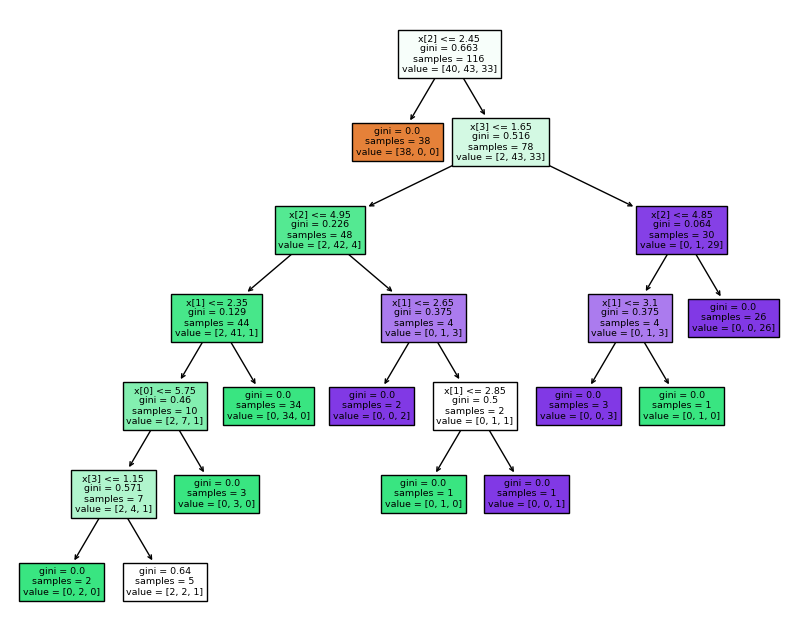

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()

In [17]:
# Any ideas how to make tree not grow fully and avoid overfitting?

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
class D_tree:
    def __init__(self, deep = 10):
        self.tree = {}
        self.deep = deep
    def los(self, j ,s, X, y):
        return  np.sum((y[X[:, j] <= s] - np.mean(y[X[:, j] <= s])) ** 2) + np.sum((y[X[:, j] >  s] - np.mean(y[X[:, j] >  s])) ** 2)
    def tree_gen(self, X_train, y_train, deep):
         
        d = {}
        l = []
        j_and_s = []
        for j in range(X_train.shape[1]):
            a = np.min(X_train[:,j])
            b = np.max(X_train[:,j])

            for s in X_train[:, j]:
                l.append(self.los(j, s, X_train, y_train))
                j_and_s.append([j, s])

        ind = np.argmin(l)
        j, s = j_and_s[ind]
        if X_train.shape[0] == 1:
            return {
                    "f" : j,
                    "val": s,
                    "left": y_train[0],
                    "right": y_train[0]
                
            }
        elif deep > 1:
            return {
               
                "f": j,
                "val": s,
                "left": self.tree_gen(X_train[X_train[:,j] <= s], y_train[X_train[:,j] <= s], deep - 1),
                "right":self.tree_gen(X_train[X_train[:,j] > s], y_train[X_train[:,j] > s],  deep - 1)
            }
        else:
            return {
                "f": j,
                "val": s,
                "left": np.mean(y_train[X_train[:, j] <= s]),
                "right": np.mean(y_train[X_train[:, j] > s])
            } 
        
    def fit(self, X_train, y_train):
        self.tree = self.tree_gen(X_train, y_train, self.deep)
        
    
    def func(self, tree, x):
        if isinstance(tree["left"], dict):
            if x[tree["f"]] <= tree["val"]:
                return self.func(tree["left"], x)
            else:
                return self.func(tree["right"], x)
        else:
            if x[tree["f"]] <= tree["val"]:
                return tree["left"]
            else:
                return tree["right"]
    
    def predict(self, X_test):
        y_pred = np.zeros(len(X_test))
        for i, x in enumerate(X_test):
            y_pred[i] = self.func(self.tree, x)
        return y_pred
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return r2_score(y_test, y_pred)

In [ ]:
# lets modify our code from the last lecture to work for classification

In [ ]:
clf = DecisionTree()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)